In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
def quant(x,c):
    return np.quantile(x,c,1)
def get_sub(r,d):
    return npl.svd(np.random.randn(r,d))[2][:r]
def randn_norm(T,r):
    X=np.random.randn(T,r)
    return np.array([X[i]/npl.norm(X[i]) for i in range(T)])

def eig_R(X,r):
    SH,V,_=npl.svd(X)
    return SH[:,:r].T,np.diag(V[:r])

def do_one_iter():
    T=Ti+To
    R=Ri+Ro
    ERR=10000*np.ones((2,3,3))
    SM=get_sub(R,d)
    

    yy=np.zeros((T,n))
    XX=np.random.randn(T,n,d)
    yt=np.zeros((T,n))
    XT=np.random.randn(T,n,d)
    betah=np.zeros((T,d))

    SMi=SM[:Ri]
    betasi=randn_norm(Ti,Ri)
    for t in range(Ti):
        yy[t]=XX[t].dot(SMi.T.dot(betasi[t])) + np.sqrt(noise) * np.random.rand((n))
        yt[t]=XT[t].dot(SMi.T.dot(betasi[t])) + np.sqrt(noise) * np.random.rand((n))
        betah[t]=XX[t].T.dot(yy[t])/n
    SMo=SM[Ri:]
    betaso=randn_norm(To,Ro)
    for t in range(Ti,T):
        yy[t]=XX[t].dot(SMo.T.dot(betaso[t-Ti])) + np.sqrt(noise) * np.random.rand((n))
        yt[t]=XT[t].dot(SMo.T.dot(betaso[t-Ti])) + np.sqrt(noise) * np.random.rand((n))
        betah[t]=XX[t].T.dot(yy[t])/n


    ### 
    # Moment-based MTL initializations
    MOM=np.zeros((d,d))
    for t in range(T):
        MOM+=np.outer(betah[t],betah[t])
    MOM/=T

    HM,_=eig_R(MOM,Ri)

    # Alternating LS for MTL variations 
    GM=HM.copy()
    beta=np.zeros((T,d))

    ITN=10
    # MTL ALS
    for it in range(ITN):
        XC=np.zeros((ni*Ti+no*To,Ri*d))
        yC=np.zeros((ni*Ti+no*To))
        for t in range(Ti):
            X=XX[t,:ni].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:ni]))
            yC[ni*(t):ni*(t+1)]=yy[t,:ni]
            XC[ni*(t):ni*(t+1)]=np.kron(GM.dot(beta[t]),XX[t,:ni])
        for t in range(Ti,T):
            X=XX[t,:no].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:no]))
            yC[ni*Ti+no*(t-Ti):ni*Ti+no*(t-Ti+1)]=yy[t,:no]
            XC[ni*Ti+no*(t-Ti):ni*Ti+no*(t-Ti+1)]=np.kron(GM.dot(beta[t]),XX[t,:no])
        errMi=0; errMTi=0
        errMo=0; errMTo=0
        for t in range(Ti):
            errMi+=npl.norm(yy[t,:ni]-XX[t,:ni].dot(beta[t]))**2/ni
            errMTi+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        for t in range(Ti,T):
            errMo+=npl.norm(yy[t,:no]-XX[t,:no].dot(beta[t]))**2/no
            errMTo+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        GM=npl.pinv(XC).dot(yC).reshape(Ri,d)
        # ERR[0,0,0]=np.minimum(ERR[0,0,0],errMi/Ti)
        # ERR[1,0,0]=np.minimum(ERR[1,0,0],errMTi/Ti)
        # ERR[0,1,0]=np.minimum(ERR[0,1,0],errMo/To)
        # ERR[1,1,0]=np.minimum(ERR[1,1,0],errMTo/To)
        # ERR[0,2,0]=np.minimum(ERR[0,2,0],(errMi+errMo)/T)
        # ERR[1,2,0]=np.minimum(ERR[1,2,0],(errMTi+errMTo)/T)
        ERR[0,0,0]=errMi/Ti
        ERR[1,0,0]=errMTi/Ti
        ERR[0,1,0]=errMo/To
        ERR[1,1,0]=errMTo/To
        ERR[0,2,0]=(errMi+errMo)/T
        ERR[1,2,0]=(errMTi+errMTo)/T

    ### 
    # Moment-based MTL initializations
    MOM=np.zeros((d,d))
    for t in range(T):
        MOM+=np.outer(betah[t],betah[t])
    MOM/=T

    HM,_=eig_R(MOM,R)

    # Alternating LS for MTL variations 
    GM=HM.copy()
    beta=np.zeros((T,d))

    ITN=10
    # MTL ALS
    for it in range(ITN):
        XC=np.zeros((ni*Ti+no*To,R*d))
        yC=np.zeros((ni*Ti+no*To))
        for t in range(Ti):
            X=XX[t,:ni].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:ni]))
            yC[ni*(t):ni*(t+1)]=yy[t,:ni]
            XC[ni*(t):ni*(t+1)]=np.kron(GM.dot(beta[t]),XX[t,:ni])
        for t in range(Ti,T):
            X=XX[t,:no].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:no]))
            yC[ni*Ti+no*(t-Ti):ni*Ti+no*(t-Ti+1)]=yy[t,:no]
            XC[ni*Ti+no*(t-Ti):ni*Ti+no*(t-Ti+1)]=np.kron(GM.dot(beta[t]),XX[t,:no])
        errMi=0; errMTi=0
        errMo=0; errMTo=0
        for t in range(Ti):
            errMi+=npl.norm(yy[t,:ni]-XX[t,:ni].dot(beta[t]))**2/ni
            errMTi+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        for t in range(Ti,T):
            errMo+=npl.norm(yy[t,:no]-XX[t,:no].dot(beta[t]))**2/no
            errMTo+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        GM=npl.pinv(XC).dot(yC).reshape(R,d)
        # ERR[0,0,1]=np.minimum(ERR[0,0,1],errMi/Ti)
        # ERR[1,0,1]=np.minimum(ERR[1,0,1],errMTi/Ti)
        # ERR[0,1,1]=np.minimum(ERR[0,1,1],errMo/To)
        # ERR[1,1,1]=np.minimum(ERR[1,1,1],errMTo/To)
        # ERR[0,2,1]=np.minimum(ERR[0,2,1],(errMi+errMo)/T)
        # ERR[1,2,1]=np.minimum(ERR[1,2,1],(errMTi+errMTo)/T)
        ERR[0,0,1]=errMi/Ti
        ERR[1,0,1]=errMTi/Ti
        ERR[0,1,1]=errMo/To
        ERR[1,1,1]=errMTo/To
        ERR[0,2,1]=(errMi+errMo)/T
        ERR[1,2,1]=(errMTi+errMTo)/T

    ### 
    # Moment-based MTL initializations
    MOM=np.zeros((d,d))
    for t in range(Ti,T):
        MOM+=np.outer(betah[t],betah[t])
    MOM/=To

    HM,_=eig_R(MOM,R)

    # Alternating LS for MTL variations 
    GM=HM.copy()
    beta=np.zeros((T,d))

    ITN=10
    # Individual ALS
    for it in range(ITN):
        XC=np.zeros((no*To,R*d))
        yC=np.zeros((no*To))
        for t in range(Ti,T):
            X=XX[t,:no].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:no]))
            yC[no*(t-Ti):no*(t-Ti+1)]=yy[t,:no]
            XC[no*(t-Ti):no*(t-Ti+1)]=np.kron(GM.dot(beta[t]),XX[t,:no])
        errMo=0; errMTo=0
        for t in range(Ti,T):
            errMo+=npl.norm(yy[t,:no]-XX[t,:no].dot(beta[t]))**2/no
            errMTo+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        GM=npl.pinv(XC).dot(yC).reshape(R,d)
        ERR[0,1,2]=errMo/To
        ERR[1,1,2]=errMTo/To

    ### 
    # Moment-based MTL initializations
    MOM=np.zeros((d,d))
    for t in range(Ti):
        MOM+=np.outer(betah[t],betah[t])
    MOM/=Ti

    HM,_=eig_R(MOM,R)

    # Alternating LS for MTL variations 
    GM=HM.copy()
    beta=np.zeros((T,d))

    ITN=10
    # Individual ALS
    for it in range(ITN):
        XC=np.zeros((ni*Ti,R*d))
        yC=np.zeros((ni*Ti))
        for t in range(Ti):
            X=XX[t,:ni].dot(GM.T)
            beta[t]=GM.T.dot(npl.pinv(X).dot(yy[t,:ni]))
            yC[ni*(t):ni*(t+1)]=yy[t,:ni]
            XC[ni*(t):ni*(t+1)]=np.kron(GM.dot(beta[t]),XX[t,:ni])
        errMi=0; errMTi=0
        for t in range(Ti):
            errMi+=npl.norm(yy[t,:ni]-XX[t,:ni].dot(beta[t]))**2/ni
            errMTi+=npl.norm(yt[t]-XT[t].dot(beta[t]))**2/n
        GM=npl.pinv(XC).dot(yC).reshape(R,d)
        ERR[0,0,2]=errMi/Ti
        ERR[1,0,2]=errMTi/Ti
    
    ERR[0,2,2]=(ERR[0,0,2]*Ti+ERR[0,1,2]*To)/T
    ERR[1,2,2]=(ERR[1,0,2]*Ti+ERR[1,1,2]*To)/T
    return ERR

In [3]:
### for different number of samples
ITN=1 # NUMBER OF AVERAGES TO RUN
noise = 0.
d=64
Ri=8
Ro=8
Tib=10
# Ti=100
To=10
ni=100
n=ni

LEN=7
ns = [5,20,30,40,60,80,100]
# ns = [10,20,30,40,50]
# ns=[1]
ERRn=np.zeros((LEN,ITN,2,3,3))
print('Vary # samples of minority')
for it in range(ITN):
    for x in range(LEN):
        no=ns[x]; Ti=Tib
        ERRn[x,it]=do_one_iter()
        print(ERRn[x,it])
    # np.save('worst_case_sample_per_task.npy',ERRn)

Vary # samples of minority
[[[2.10110036e-04 9.67270103e-05 8.54177957e-05]
  [3.51839667e-30 4.17264051e-28 7.54035481e-06]
  [1.05055018e-04 4.83635052e-05 4.64790752e-05]]

 [[1.10474222e-03 1.32239120e-04 9.59211400e-05]
  [4.51626049e+00 2.49150955e+01 1.59703260e+00]
  [2.25868262e+00 1.24576139e+01 7.98564259e-01]]]
[[[1.54103501e-02 8.91714935e-15 2.29156333e-04]
  [2.05398650e-02 2.99486183e-15 2.55117910e-05]
  [1.79751075e-02 5.95600559e-15 1.27334062e-04]]

 [[5.00539445e-02 6.04908127e-14 2.62450477e-04]
  [6.16476494e+00 6.64744361e+01 8.48811693e-01]
  [3.10740944e+00 3.32372180e+01 4.24537072e-01]]]
[[[3.96372176e-02 4.79997610e-12 8.05902938e-05]
  [7.43157324e-02 2.17822590e-15 5.51002861e-05]
  [5.69764750e-02 2.40107716e-12 6.78452899e-05]]

 [[1.12322359e-01 3.52670602e-11 1.19271169e-04]
  [1.82303576e+00 6.93180428e+00 6.91958827e-01]
  [9.67679061e-01 3.46590214e+00 3.46039049e-01]]]
[[[4.96755262e-02 3.31495247e-08 2.07843038e-05]
  [8.95091437e-02 2.78463876e-

In [4]:
# ITN=20 # NUMBER OF AVERAGES TO RUN
# r=2
# d=32
# Ri=8
# Ro=8
# Tib=100
# # Ti=100
# To=10
# nb=30


# LEN=9
# # ns=(np.arange(LEN)+1)*5
# ns = [5,10,15,20,30,40,60,80,100]
# ps=(np.arange(LEN)+1)

# ERRn=np.zeros((LEN,ITN,2,3,2))
# print('Vary # samples')
# for it in range(ITN):
#     for x in range(LEN):
#         n=ns[x]; Ti=Tib
#         ERRn[x,it]=do_one_iter()
#         print(ERRn[x,it])
#     # np.save('worst_case_sample_per_task.npy',ERRn)

# ERRp=np.zeros((LEN,ITN,2,3,2))
# print('Vary # good tasks')
# for it in range(ITN):
#     for x in range(LEN):
#         Ti=To*ps[x]; n=nb
#         ERRp[x,it]=do_one_iter()
#         print(ERRp[x,it])
#     # np.save('worst_case_good_task_number.npy',ERRp)


# np.save('error_n.npy',ERRn)

In [5]:
# import numpy as np
# arr1=np.load('worst_case_sample_per_task.npy')
# arr2=np.load('worst_case_good_task_number.npy')
# print(arr1.shape,arr2.shape)
# # arr1 = arr1.mean(axis=1)[:,1]
# # arr2 = arr2.mean(axis=1)[:,1]
# # arr1 = quant(arr1,0.5)[:,1]
# # arr2 = quant(arr2,0.5)[:,1]
# print(arr1.shape,arr2.shape)


In [6]:
# print(ERRp[:,1,1,:,1])
# print(np.arange(9)+1)
# for i in range(9):
#     row = ERRp[i,0,1,:,1]
#     print(row[0]*(i+1)*10+row[1]*10-row[2]*(i+2)*10)

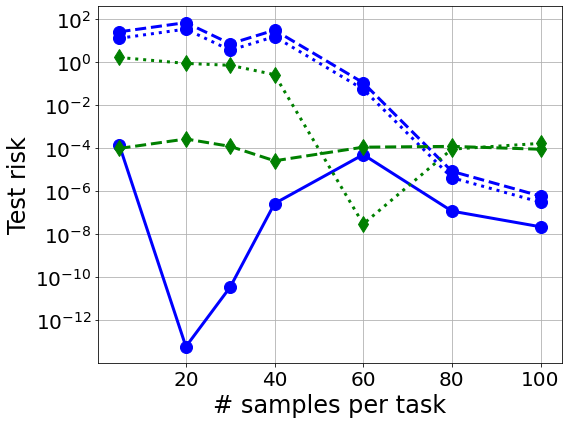

In [7]:
mrk=['s','o','d']
col=['r','b','g']
labels=['majority','minority']
plt.figure(figsize=(8,6))
idx = 1
for i in range(idx,idx+1):
    plt.semilogy(ns,quant(ERRn[:,:,1,0,i],0.5),col[i]+'-'+mrk[i],linewidth=3,markersize=12,label=labels[i])
    plt.semilogy(ns,quant(ERRn[:,:,1,1,i],0.5),col[i]+'--'+mrk[i],linewidth=3,markersize=12,label=labels[i])
    plt.semilogy(ns,quant(ERRn[:,:,1,2,i],0.5),col[i]+':'+mrk[i],linewidth=3,markersize=12,label=labels[i])
plt.semilogy(ns,quant(ERRn[:,:,1,0,2],0.5),col[2]+'--'+mrk[-1],linewidth=3,markersize=12,label='Individual')
plt.semilogy(ns,quant(ERRn[:,:,1,1,2],0.5),col[2]+':'+mrk[-1],linewidth=3,markersize=12,label='Individual')
    # plt.fill_between(ns,quant(ERRn[:,:,1,0,i],0.25),quant(ERRn[:,:,1,0,i],0.75),alpha=0.25,color=col[i])
    # plt.fill_between(ns,quant(ERRn[:,:,1,1,i],0.25),quant(ERRn[:,:,1,1,i],0.75),alpha=0.25,color=col[i])
    # plt.fill_between(ns,quant(ERRn[:,:,1,2,i],0.25),quant(ERRn[:,:,1,2,i],0.75),alpha=0.25,color=col[i])
# plt.ylim([0.01,2])
# plt.xlim([0,20])
# plt.legend([r'$R_1$, majority',r'$R_1$, minority',r'$R_1+R_2$, majority',r'$R_1+R_2$, minority'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# samples per task',fontsize=24)
plt.ylabel('Test risk',fontsize=24)
plt.grid(True)
plt.tight_layout()
# plt.savefig('sample_fig.pdf')

# plt.figure(figsize=(8,6))
# for i in range(2):
#     plt.semilogy(To*ps,quant(ERRp[:,:,1,0,i],0.5),col[i]+'-'+mrk[i],linewidth=3,markersize=12)
#     plt.semilogy(To*ps,quant(ERRp[:,:,1,1,i],0.5),col[i]+'--'+mrk[i],linewidth=3,markersize=12)
#     plt.semilogy(To*ps,quant(ERRp[:,:,1,2,i],0.5),col[i]+':'+mrk[i],linewidth=3,markersize=12)
#     plt.fill_between(To*ps,quant(ERRp[:,:,1,0,i],0.25),quant(ERRp[:,:,1,0,i],0.75),alpha=0.25,color=col[i])
#     plt.fill_between(To*ps,quant(ERRp[:,:,1,1,i],0.25),quant(ERRp[:,:,1,1,i],0.75),alpha=0.25,color=col[i])
#     plt.fill_between(To*ps,quant(ERRp[:,:,1,2,i],0.25),quant(ERRp[:,:,1,2,i],0.75),alpha=0.25,color=col[i])
# plt.ylim([0.002,2])
# # plt.xlim([0,20])
# plt.legend([r'$R_1$, majority',r'$R_1$, minority',r'$R_1+R_2$, majority',r'$R_1+R_2$, minority'],fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel('# tasks in majority',fontsize=24)
# plt.ylabel('Test risk',fontsize=24)
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('sample_fig.pdf')